In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import time

# Clastering

### Introduce

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

In [12]:
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Let's **use a model GaussianMixture for clastering instances** (of couse without using labeles)

In [13]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)

y_pred = gm.predict(X)

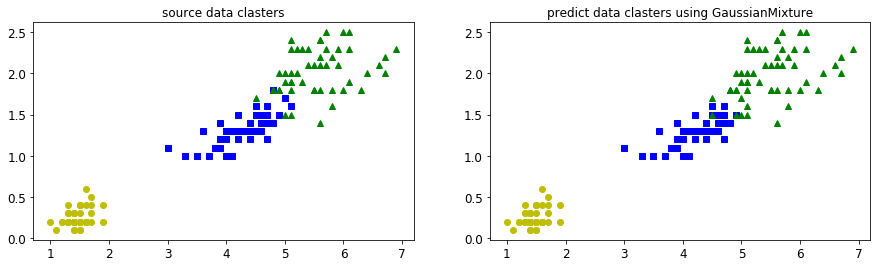

In [22]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Cluster 1")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Cluster 2")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Cluster 3")
plt.title("source data clasters")

plt.subplot(122)
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "bs", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "g^", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "yo", label="Cluster 3")
plt.title("predict data clasters using GaussianMixture")
plt.show()

### K-Means

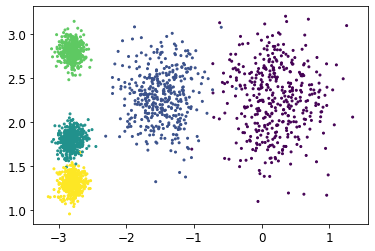

In [3]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]) #centers each of 5 clasters
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) #instances deviation at each claster

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X[:, 0], X[:, 1], s=4, c=y)
plt.show()

Теперь передадим набор данных алгоритму K-Means без лейблов и посмотрим как он справится с кластеризацией

In [4]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

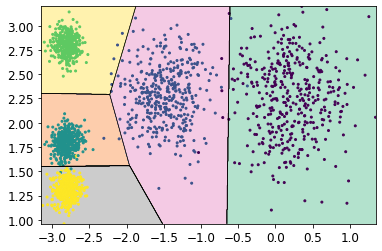

In [37]:
x1 = np.linspace(np.min(X[:, 0]), np.max(X[:,0]), 1000)
x2 = np.linspace(np.min(X[:, 1]), np.max(X[:,1]), 1000)

x1s, x2s = np.meshgrid(x1, x2)
x_new = np.c_[x1s.ravel(), x2s.ravel()]

y_mark = kmeans.predict(x_new).reshape(x1s.shape)

plt.contourf(x1s, x2s, y_mark, cmap="Pastel2")
plt.contour(x1s, x2s, y_mark, colors="black", linewidths=0.5)
plt.scatter(X[:, 0], X[:, 1], s=4, c=y)
plt.show()

Визуально видно, что кол-во ошибок кластеризации не велико.

Из модели kmeans мы можем получить все лейблы (он сохраняет их в модели), центра кластеров

In [10]:
print(y_pred is kmeans.labels_)
print(kmeans.cluster_centers_)

True
[[ 0.20876306  2.25551336]
 [-2.80389616  1.80117999]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]
 [-2.80037642  1.30082566]]


Вывод расстояния экземпляров данных до центров кластеров

In [13]:
kmeans.transform(X[:5])

array([[3.04611916, 0.46779778, 1.54944305, 1.45402521, 0.11146795],
       [3.11541584, 0.07122059, 1.48612753, 0.99002955, 0.51431557],
       [1.32016676, 3.81713488, 2.67154781, 4.09069201, 3.76340605],
       [3.18153989, 0.13643124, 1.55085758, 1.00503563, 0.52058348],
       [2.98883057, 0.14170053, 1.39477359, 1.11490543, 0.39014221]])

Выведем инерцию модели (подробнее в onenote)

In [15]:
kmeans.inertia_

211.5985372581684

n_init укзаывает сколько раз алгоритм будет перезапускаться и заного случайным обазом подбирать центры кластеров. В данном примере я заранее нашел значения random_state, чтобы алгоритм свалился в локальный миниум и используя гиперпараметр n_init=1 не даю ему искать более оптимальное решения. Все ради визуализации результата кластеризации при попадании в локальный миниум.

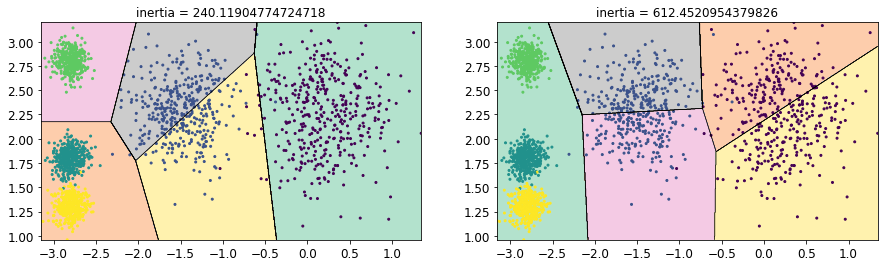

In [47]:
randoms = {("121", 50), ("122", 1300)}
plt.figure(figsize=(15, 4))

for rand in randoms:
    plt.subplot(rand[0])
    kmeans_ = KMeans(n_clusters=k, n_init=1, random_state=rand[1])
    kmeans_.fit(X)
    y_mark_ = kmeans_.predict(x_new).reshape(x1s.shape)
    plt.contourf(x1s, x2s, y_mark_, cmap="Pastel2")
    plt.contour(x1s, x2s, y_mark_, colors="black", linewidths=0.5)
    plt.scatter(X[:, 0], X[:, 1], s=4, c=y)
    plt.title("inertia = {}".format(kmeans_.inertia_))

plt.show()

Если мы случайно узнали примерное расположение локальных минимумов, то можно помочь алгоритму не свалиться в локальный минимум (будет использовать плохое значение random_state)

In [51]:
good_init = np.array(
    [[ 0,  2],
     [-2,  2],
     [-3,  2],
     [-3,  3],
     [-3,  1]])

kmeans_ = KMeans(n_clusters=k, init=good_init, n_init=1, random_state=1300)
kmeans_.fit(X)
print("inertia:", kmeans_.inertia_)

inertia: 211.5985372581684


### Accelerated K-Means and Mini-batch K-Means

**using  Charles Elkan method**

In [25]:
pt = time.time()
kmeans = KMeans(n_clusters=k, algorithm='full', random_state=42)
kmeans.fit(X)
print("full took: {:.4} sec.".format(time.time() - pt))
print(kmeans.inertia_)

full took: 0.08241 sec.
211.59853725816822


In [26]:
pt = time.time()
kmeans = KMeans(n_clusters=k, algorithm='elkan', random_state=42)
kmeans.fit(X)
print("elkan took: {:.4} sec.".format(time.time() - pt))
print(kmeans.inertia_)

elkan took: 0.06513 sec.
211.5985372581684


In [27]:
pt = time.time()
kmeans = KMeans(n_clusters=k, algorithm='auto', random_state=42)
kmeans.fit(X)
print("auto took: {:.4} sec.".format(time.time() - pt))
print(kmeans.inertia_)

auto took: 0.06538 sec.
211.5985372581684


**using MiniBatchMeans**

In [29]:
from sklearn.cluster import MiniBatchKMeans

pt = time.time()
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)
print("MiniBatchKMeans took: {:.4} sec.".format(time.time() - pt))
print(minibatch_kmeans.inertia_)

MiniBatchKMeans took: 0.04755 sec.
213.2530781285407


**MiniBatchMeans using partial_fit**

In [37]:
def load_next_batch(batch_size, arr):
    return arr[np.random.choice(len(arr), batch_size, replace=False)]

In [ ]:
n_init = 10 #аналогичный гиперпараметр для KMeans
n_iterations = 100 #кол-во итераций обучения на отдельных mini-batch данных
batch_size = 100 #размер данных для обучения на каждой итерации (размер mini-batch)
init_size = 500  #Для инициализации алгоритма лучше подать больше данных
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size, X)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size, X)
        minibatch_kmeans.partial_fit(X_batch)
        #суммарная инерация расчитывается суммируя инерции модели на шагах (90...99)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

### Finding the Optimal Number of Clusters

**using the "elbow rule"**

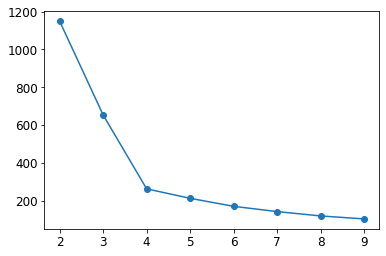

In [19]:
inertias = list()

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
inertias = np.c_[np.arange(2, 10), inertias]
plt.plot(inertias[:, 0], inertias[:, 1])
plt.scatter(inertias[:, 0], inertias[:, 1])

k=4 представляет собой оптимальную точку, т.к. после нее увеличение кол-ва центроидов не приводит к существенному сокращению инерции

**using silhouette_score***

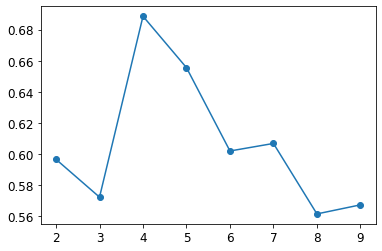

In [21]:
from sklearn.metrics import silhouette_score

scores = list()

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))
    
scores = np.c_[np.arange(2, 10), scores]
plt.plot(scores[:, 0], scores[:, 1])
plt.scatter(scores[:, 0], scores[:, 1])

k=4 и k=5 хорошие точки. В предыдущем методе не видно, но эти точки существенно лучше 6, 7...

### Using clustering for image segmentation

In [27]:
import urllib

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7fbca47b1470>)

(533, 800, 3)


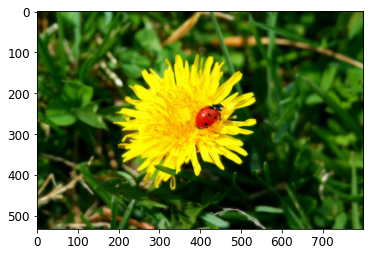

In [31]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))
print(image.shape)
plt.imshow(image)

In [25]:
plt.image(image)

AttributeError: module 'matplotlib.pyplot' has no attribute 'image'